# Activity: Full OSEMN

## Introduction

In this assignment, you will work on a data analysis project. This project will
let you practice the skills you have learned in this course and write real code
in Python.

You will perform the following steps of the OSEMN framework:  
- [Scrub](#scrub)
- [Explore](#explore)
- [Interpret](#interpret)

In [1]:
# We'll import the libraries you'll likely use for this activity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
df = pd.read_csv('transactions-pet_store.csv')
df_orig = df.copy()

## Scrub

You will scrub the data. It's important that you follow the directions as
stated. Doing more or less than what is asked might lead to not getting full
points for the question.

------

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

#### Question 1

Remove all rows that have are missing either the `Product_Name` or the
`Product_Category`. Assign the cleaned DataFrame to the variable `df`
(overwriting the original DataFrame.).

In [2]:
# Your code here

df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,NaN,1,treat,cat
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,NaN,3,toy,cat
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,large,3,bedding,dog
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,NaN,3,bedding,dog
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,small,1,bedding,dog


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2903 non-null   object 
 1   Order_Number      2903 non-null   object 
 2   Customer_ID       2853 non-null   object 
 3   Product_Name      2874 non-null   object 
 4   SKU               2903 non-null   object 
 5   Price             2903 non-null   float64
 6   Size              658 non-null    object 
 7   Quantity          2903 non-null   int64  
 8   Product_Category  2758 non-null   object 
 9   Product_Line      2901 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 226.9+ KB


In [4]:
df.shape

(2903, 10)

In [5]:
df.isnull().sum()

Date                   0
Order_Number           0
Customer_ID           50
Product_Name          29
SKU                    0
Price                  0
Size                2245
Quantity               0
Product_Category     145
Product_Line           2
dtype: int64

In [6]:
# Drop rows with missing values in the "column_name" column
df.dropna(subset=['Product_Name','Product_Category'], inplace=True)

In [7]:
df.isnull().sum()

Date                   0
Order_Number           0
Customer_ID           42
Product_Name           0
SKU                    0
Price                  0
Size                2132
Quantity               0
Product_Category       0
Product_Line           0
dtype: int64

In [8]:
df.shape

(2758, 10)

In [9]:
df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,NaN,1,treat,cat
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,NaN,3,toy,cat
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,large,3,bedding,dog
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,NaN,3,bedding,dog
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,small,1,bedding,dog


In [10]:
# Question 1 Grading Checks

assert df.shape[0] <= 2874, 'Did you remove all the rows with missing values for the columns Product_Name & Product_Category?'
assert df.shape[0] >= 2700, 'Did you remove too many the rows with missing values?'
assert len(df.columns) == 10, 'Make sure you do not drop any columns.'

#### Question 2

Find any clearly "incorrect" values in the `Price` column and "clean" the
DataFrame to address those values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [11]:
# Your code here

df.Price.unique()

array([ 3.9550e+01,  2.6950e+01,  2.3070e+01,  2.8040e+01,  1.3840e+01,
        1.8530e+01,  2.9660e+01,  3.8170e+01,  2.1820e+01,  3.9240e+01,
        1.5340e+01,  3.6300e+01,  1.0800e+01,  3.4380e+01,  2.9470e+01,
        3.0630e+01,  1.9960e+01,  1.7160e+01,  2.4530e+01,  1.4530e+01,
        2.5480e+01,  1.6710e+01,  1.9873e+04,  3.9320e+01, -1.9873e+04])

In [12]:
df.Price.max()

19873.0

In [13]:
df.Price.min()

-19873.0

In [14]:
df.Price.describe()

count     2758.000000
mean        25.621632
std        535.327290
min     -19873.000000
25%         17.160000
50%         25.480000
75%         34.380000
max      19873.000000
Name: Price, dtype: float64

In [15]:
df.Price.quantile(0.0001)

-14391.03634

In [16]:
df.Price.quantile(0.0001).sum()

-14391.03634

In [17]:
(df.Price < df.Price.quantile(0.0001).sum()).sum()

1

In [18]:
(df.Price > df.Price.quantile(0.999).sum()).sum()

1

In [19]:
df["Price"].replace(to_replace=-19873.00, value=-1000.00, inplace=True)

In [20]:
df["Price"].replace(to_replace=-1000.00, value=0.00, inplace=True)

In [21]:
df["Price"].replace(to_replace=19873.000000, value=0.00, inplace=True)

In [22]:
# Question 2 Grading Checks

assert (df.Price < df.Price.quantile(0.0001)).sum() == 0, 'Check for very small values'
assert (df.Price > df.Price.quantile(0.999)).sum() == 0, 'Check for very large values'

#### Question 3

After you've done the cleaning above, remove any column that has more than `500`
missing values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [23]:
# Your code here

df.isnull().sum()

Date                   0
Order_Number           0
Customer_ID           42
Product_Name           0
SKU                    0
Price                  0
Size                2132
Quantity               0
Product_Category       0
Product_Line           0
dtype: int64

In [24]:
df.drop(["Size"], axis=1, inplace=True)

In [25]:
df.columns

Index(['Date', 'Order_Number', 'Customer_ID', 'Product_Name', 'SKU', 'Price',
       'Quantity', 'Product_Category', 'Product_Line'],
      dtype='object')

In [26]:
# Question 3 Grading Checks

assert len(df.columns) < 10, 'You should have dropped 1 or more columns (with more than 500 missing values)'

#### Question 4

Address the other missing values. You can replace the values or remvove them,
but whatever method you decide to clean the DataFrame, you should no longer have
any missing values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [27]:
# Your code here

df.isnull().sum()

Date                 0
Order_Number         0
Customer_ID         42
Product_Name         0
SKU                  0
Price                0
Quantity             0
Product_Category     0
Product_Line         0
dtype: int64

In [28]:
df.Customer_ID

0       476582ea-1bba-4289-8775-3fcd8074821c
1       476582ea-1bba-4289-8775-3fcd8074821c
2       476582ea-1bba-4289-8775-3fcd8074821c
3       5929a0e9-95a7-4dbf-896e-c11d1988615e
4       5929a0e9-95a7-4dbf-896e-c11d1988615e
                        ...                 
2898    468f40b3-59ca-47fd-9739-c7f19cf48f32
2899    468f40b3-59ca-47fd-9739-c7f19cf48f32
2900    468f40b3-59ca-47fd-9739-c7f19cf48f32
2901    468f40b3-59ca-47fd-9739-c7f19cf48f32
2902    f2a090b3-ec77-4018-939e-1a18d2b4f4ef
Name: Customer_ID, Length: 2758, dtype: object

In [29]:
df["Customer_ID"].fillna(value="Missing", inplace=True)

In [30]:
df["Customer_ID"].value_counts()

Missing                                 42
9661b347-470c-4a8b-8924-fda98c4e935c    18
dfb40ee9-0eb3-4a77-b88d-2023611258c4    17
ee6d3390-4969-43f2-8adf-3601877a2c9d    17
b20bec48-9ebb-40c4-90e4-f71605a39363    17
                                        ..
bbb287af-24d9-4b13-8cfa-535bccc79afc     1
7ae8c57f-f0e1-4519-8139-9a091e524290     1
93ae4647-8d4a-4229-b261-168ae843236e     1
b497596f-42ee-48dd-a004-a271573d1f41     1
a5e495e0-5c57-4d47-9394-4844167d3c74     1
Name: Customer_ID, Length: 632, dtype: int64

In [31]:
df.isnull().sum()

Date                0
Order_Number        0
Customer_ID         0
Product_Name        0
SKU                 0
Price               0
Quantity            0
Product_Category    0
Product_Line        0
dtype: int64

In [32]:
# Question 4 Grading Checks

assert df.Customer_ID.isna().sum() == 0, 'Did you address all the missing values?'

## Explore

You will explore the data. It's important that you follow the directions as
stated. Doing more or less than what is asked might lead to not getting full
points for the question.

You may use either exploratory statistics or exploratory visualizations to help
answer these questions.

------

Note that the DataFrame loaded for this section (in the below cell) is different
from the data you used in the [Scrub](#scrub) section.

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

In [33]:
df = pd.read_csv('transactions-pet_store-clean.csv')

In [34]:
df.Product_Name.unique()

array(['Feline Fix Mix', 'Scratchy Post', 'Reddy Beddy',
       'Snoozer Essentails', 'Whole Chemistry Recipe', 'Cat Cave',
       'Chewie Dental', 'Tug-a-Back', 'Chomp-a Plush', 'Snack-em Fish',
       'Foozy Mouse', 'Snoozer Hammock', 'Fetch Blaster', 'Yum Fish-Dish',
       'Purrfect Puree', 'New Dish', 'Purr Mix', 'Tuna Tasties',
       'All Veggie Yummies', 'Ball and String', 'Kitty Climber'],
      dtype=object)

#### Question 5

Create a `Subtotal` column by multiplying the `Price` and `Quantity` values. 
This represents how much was spent for a given transaction (row).

In [35]:
# Your code here

df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,1,treat,cat
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,3,toy,cat
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,3,bedding,dog
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,1,bedding,dog


In [36]:
df["Subtotal"] = df["Price"] * df["Quantity"]

In [37]:
df.head()

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line,Subtotal
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,1,treat,cat,39.55
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,3,toy,cat,80.85
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog,69.21
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,3,bedding,dog,84.12
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,1,bedding,dog,13.84


In [38]:
# Question 5 Grading Checks

assert 'Subtotal' in df.columns, ''

#### Question 6

Determine most common category (`Product_Category`) purchases (number of total
items) for both `Product_Line` categories. Assign the (string) name of these
categories to their respective variables `common_category_cat` & 
`common_category_dog`.

In [39]:
# Your code here

common_category1 = pd.DataFrame(df.groupby(["Product_Category","Product_Line"], as_index=False)["Quantity"].sum().sort_values(by="Quantity", ascending=False))
common_category1.reset_index(inplace=True, drop=True)
common_category1

,Product_Category,Product_Line,Quantity
0,treat,cat,1026
1,bedding,dog,953
2,toy,cat,851
3,toy,dog,662
4,bedding,cat,526
5,food,dog,505
6,treat,dog,453
7,food,cat,422


In [40]:
common_category_cat = common_category1["Product_Category"].iloc[0]
common_category_cat

'treat'

In [41]:
type(common_category_cat)

str

In [42]:
common_category_dog = common_category1["Product_Category"].iloc[1]
common_category_dog

'bedding'

In [43]:
type(common_category_dog)

str

In [44]:
# Question 6 Grading Checks

assert isinstance(common_category_dog, str), 'Ensure you assign the name of the category (string) to the variable common_category_dog'
assert isinstance(common_category_cat, str), 'Ensure you assign the name of the category (string) to the variable common_category_cat'

#### Question 7

Determine which categories (`Product_Category`), by `Product_Line` have the
***median*** highest `Price`.
Assign the (string) name of these categories to their respective variables
`priciest_category_cat` & `priciest_category_dog`.

In [45]:
# Your code here

df2 = pd.DataFrame(df.groupby(["Product_Category","Product_Line"], as_index=False)["Price"].median().sort_values(by="Price", ascending=False))

df2.reset_index(inplace=True, drop=True)

df2

,Product_Category,Product_Line,Price
0,bedding,cat,29.66
1,toy,dog,29.47
2,bedding,dog,28.04
3,treat,dog,25.48
4,food,cat,24.53
5,treat,cat,19.96
6,food,dog,18.53
7,toy,cat,16.71


In [46]:
priciest_category_dog = df2["Product_Category"].iloc[1]
priciest_category_dog

'toy'

In [47]:
priciest_category_cat = df2["Product_Category"].iloc[0]
priciest_category_cat

'bedding'

In [48]:
# Question 7 Grading Checks

assert isinstance(priciest_category_dog, str), 'Ensure you assign the name of the category (string) to the variable priciest_category_dog'
assert isinstance(priciest_category_cat, str), 'Ensure you assign the name of the category (string) to the variable priciest_category_cat'

## Modeling

This is the point of the framework where we'd work on modeling with our data.
However, in this activity, we're going to move straight to interpretting.

## Interpret

You will interpret the data based on what you found so far. It's important that
you follow the directions as stated. Doing more or less than what is asked might
lead to not getting full points for the question.


------

Note that the DataFrame loaded for this section (in the below cell) is the same
as the data you used in the [Explore](#explore) section.

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

#### Question 8

You want to emphasize to your stakeholders that the total number of product
categories sold differ between the two `Product_Line` categories (`'cat'` & 
`'dog'`).

Create a **_horizontal_ bar plot** that has `Product_Category` on the y-axis and
the total number of that category sold (using the `Quantity`) by each 
`Product_Line` category. Also **change the axis labels** to something meaningful
and add a title.

You will likely want to use Seaborn. Make sure you set the result to the
variable `ax` like the following:
```python
ax = # code to create a bar plot
```

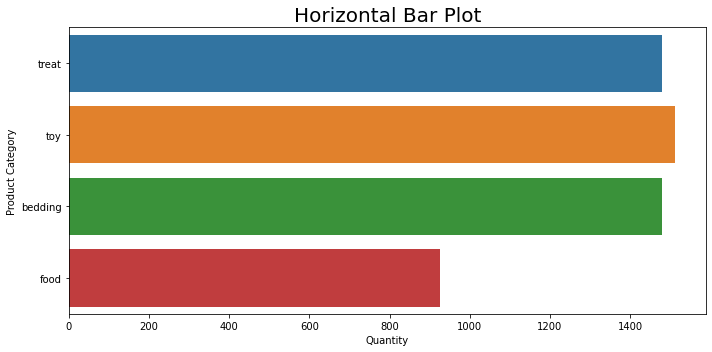

In [49]:
# Your code here

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x=df.Quantity, y=df.Product_Category, data=df, errorbar=None, estimator="sum")
plt.title("Horizontal Bar Plot", size=20)
plt.ylabel("Product Category")

plt.tight_layout()
plt.show()

In [50]:
# Question 8 Grading Checks

assert isinstance(ax, plt.Axes), 'Did you assign the plot result to the variable ax?'

#### Question 9

Based on the plot from [Question 8](#question-8), what would you conclude for
your stakeholders about what products they should sell? What would be the
considerations and/or caveats you'd communicate to your stakeholders?

Write at least a couple sentences of your thoughts in a string assigned to the
variable `answer_to_9`.

The cell below should look something like this:
```python
answer_to_9 = '''
I think that based on the visualization that ****.
Therefore I would communicate with the stakeholders that ****
'''
```

In [51]:
# Your code here
answer_to_9 = '''

From the bar graph, toy has a slightly more compared to the rest. They sell almost similar amounts****.

I recommend diversified all product categories to reach out for more customers ****.

'''

In [52]:
answer_to_9

'\n\nFrom the bar graph, toy has a slightly more compared to the rest. They sell almost similar amounts****.\n\nI recommend diversified all product categories to reach out for more customers ****.\n\n'

In [53]:
# Question 9 Grading Checks

assert isinstance(answer_to_9, str), 'Make sure you create a string for your answer.'

#### Question 10

The plot you created for [Question 8](#question-8) is good but could be modified
to emphasize which products are important for the business.

Create an explanatory visualization that emphasizes the insight you about the
product category. This would be a visualization you'd share with the business
stakeholders.

Make sure you set the result to the variable `ax` like the following:
```python
ax = # code to create explanatory visualization
```

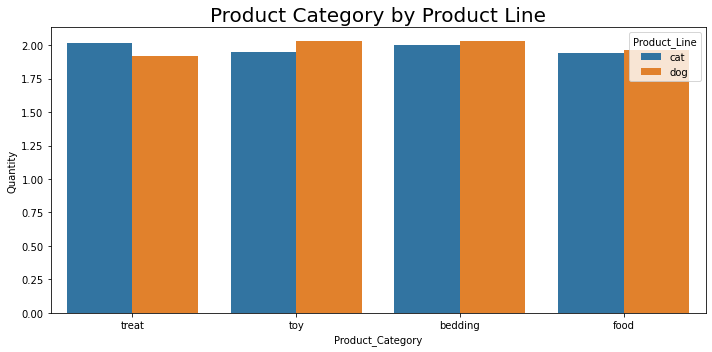

In [54]:
# Your code here

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(y=df.Quantity, x=df.Product_Category, hue=df.Product_Line, data=df, errorbar=None)

plt.title("Product Category by Product Line", size=20)
plt.tight_layout()
plt.show()

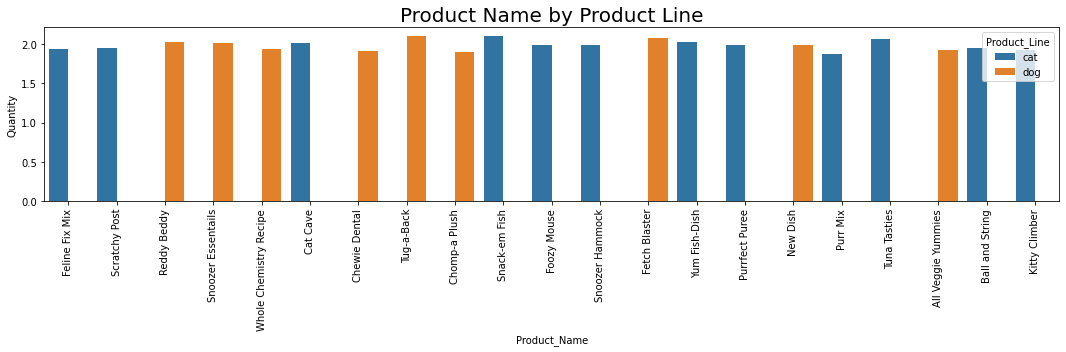

In [55]:
# Your code here

fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(y=df.Quantity, x=df.Product_Name, hue=df.Product_Line, data=df, errorbar=None)

plt.title("Product Name by Product Line", size=20)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [56]:
# Question 10 Grading Checks

assert isinstance(ax, plt.Axes), 'Did you assign the plot result to the variable ax?'